# Model Explainability with SHAP (Fraud Detection)

### Why Explainability?

In fintech fraud detection:
- Regulators require transparency
- Risk teams need to trust the model
- Business teams need actionable insights

SHAP (SHapley Additive exPlanations) explains:
- Global feature importance
- Individual fraud decisions
- Direction of feature impact


In [1]:
# Import 


import pandas as pd
import numpy as np

import shap

import matplotlib.pyplot as plt

In [2]:
# Load the Model & Data

import joblib
import xgboost as xgb  # make sure xgboost is imported

# load trained model 
model = joblib.load('../Model/xgb_model.pkl')

# Load Data 
df = pd.read_csv('../data/features_train.csv')

TARGET = 'isFraud'
x = df.drop(columns=[TARGET])
y = df[TARGET]

In [3]:
# Encoding Categorical Features (Same as Training)
from sklearn.preprocessing import LabelEncoder

cat_cols = x.select_dtypes(include=["object"]).columns

for col in cat_cols:
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col].astype(str))


In [4]:
# Sample Data ---> SHAP is computationally expensive 
x_sample = x.sample(2000, random_state= 42)

# Creat SHAP Explainer
explainer = shap.TreeExplainer(model)
shap_values =  explainer.shap_values(x_sample)


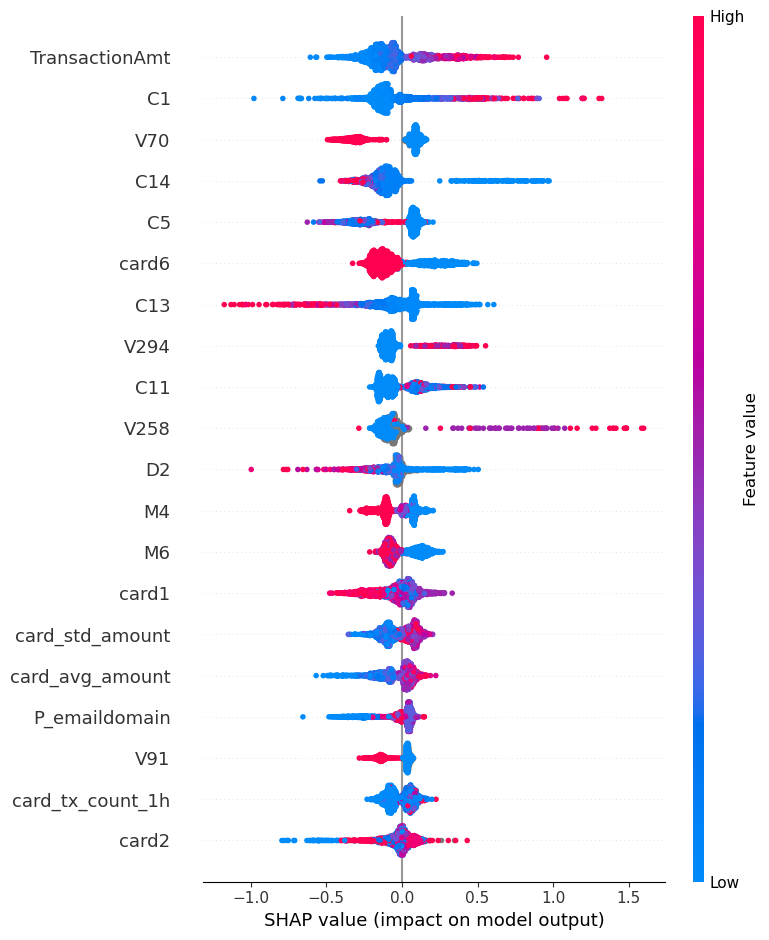

In [5]:
# Global Feature Importance 
# shape summary plot 
shap.summary_plot(shap_values, x_sample)

## How to explain this to business:

- Top = most influential features

- Red = high feature value

- Blue = low feature value

- Right = increases fraud risk

- Left = decreases fraud risk

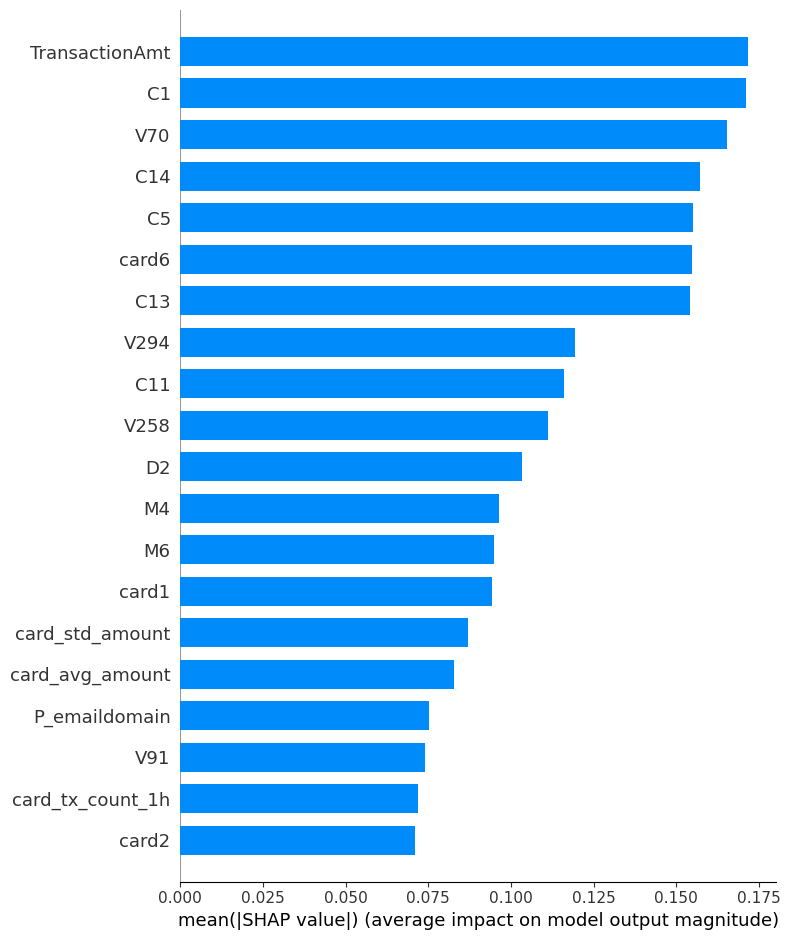

In [6]:
# Bar Plot 
shap.summary_plot(shap_values, x_sample, plot_type="bar")


## Use this for:

- Slides

- Executive summaries

- Non-technical stakeholde

In [7]:
# Explain Individual Fraud Case
# 1. Pick a fraud transaction
fraud_idx = x_sample.index[y.loc[x_sample.index] == 1][0]

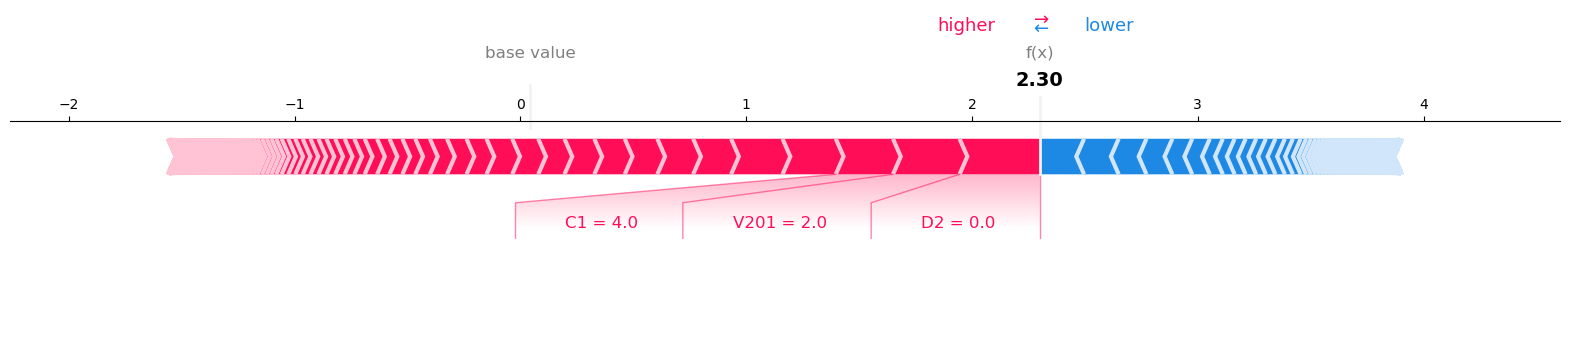

In [8]:
shap.force_plot(
    explainer.expected_value,
    shap_values[x_sample.index.get_loc(fraud_idx)],
    x_sample.loc[fraud_idx],
    matplotlib=True
)


### Interpretation:

- Red → pushes toward fraud

- Blue → pushes toward legit

- Sum = final fraud probability

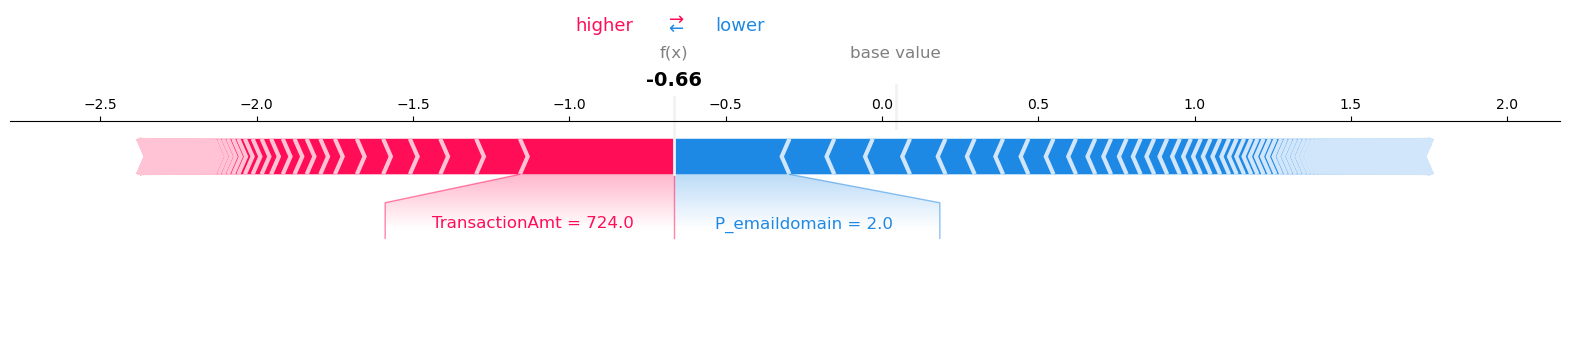

In [9]:
# Explain legit Transaction 

legit_idx = x_sample.index[y.loc[x_sample.index] == 0][0]

shap.force_plot(
    explainer.expected_value,
    shap_values[x_sample.index.get_loc(legit_idx)],
    x_sample.loc[legit_idx],
    matplotlib=True
)


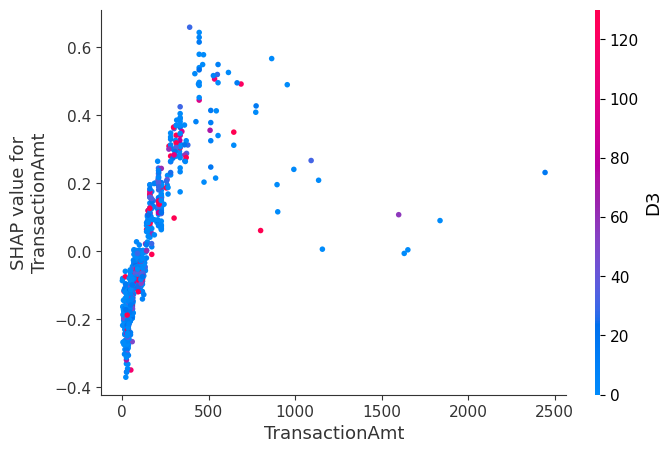

In [10]:
# Feature Impact Analysis 
shap.dependence_plot(
    "TransactionAmt",
    shap_values,
    x_sample
)


### Explainability Insights

- The model relies heavily on transaction amount, card behavior patterns, and device signals
- High-risk patterns include unusual amounts and abnormal card activity frequency
- Explainability confirms the model aligns with domain intuition

This satisfies regulatory and business transparency requirements.
